<a href="https://colab.research.google.com/github/GMISSAGLIA/GM_PyLab/blob/Main/MITXPRO_CASE3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT xPRO: DSx
Data Science and Big Data Analytics: Making Data-Driven Decisions
Case study 3.1

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_excel(r'challenger-data.xlsx')

In [ ]:
data.shape

(120, 3)

In [ ]:
data.size

360

In [ ]:
data.ndim

2

In [ ]:
data.axes

[RangeIndex(start=0, stop=120, step=1),
 Index(['Observation', 'Y', 'X'], dtype='object')]

In [ ]:
FailureFilter = data.Y == 1
NoFailureFilter = data.Y == 0


In [ ]:

failures = data.loc[FailureFilter]
no_failures = data.loc[NoFailureFilter]

In [ ]:
failures_freq = failures.X.value_counts()#failures.groupby('X')
no_failures_freq = no_failures.X.value_counts()

In [ ]:
failures_freq

53    3
75    2
70    2
63    1
58    1
57    1
Name: X, dtype: int64

In [ ]:
no_failures_freq

70    18
67    15
76    10
75     8
80     5
66     5
68     5
69     5
81     5
72     5
73     5
78     5
79     5
63     4
58     4
57     4
53     2
Name: X, dtype: int64

In [ ]:
type(no_failures_freq)


pandas.core.series.Series

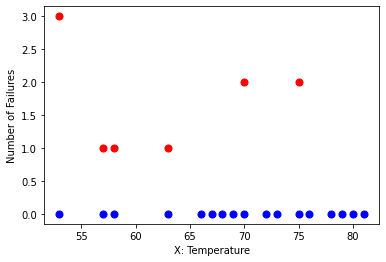

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.scatter(failures_freq.index, failures_freq, c='red', s=50)
plt.scatter(no_failures_freq.index, np.zeros(len(no_failures_freq)), c='blue', s=50)
plt.xlabel('X: Temperature')
plt.ylabel('Number of Failures')
plt.show()

In [ ]:
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm
#get the data in correct format
y, X = dmatrices('Y ~ X', data, return_type = 'dataframe')
X

,Intercept,X
0,1.0,53.0
1,1.0,53.0
2,1.0,53.0
3,1.0,53.0
4,1.0,53.0
...,...,...
115,1.0,81.0
116,1.0,81.0
117,1.0,81.0
118,1.0,81.0


In [ ]:
#build the model
logit = sm.Logit(y, X)
result = logit.fit()
# summarize the model
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.242411
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:                  0.1549
Time:                        22:12:03   Log-Likelihood:                -29.089
converged:                       True   LL-Null:                       -34.420
Covariance Type:            nonrobust   LLR p-value:                  0.001094
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4049      3.041      2.435      0.015       1.445      13.365
X             -0.1466      0.